In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
matrix1 = [[r for r in range(5)] for c in range(2)]
matrix2 = [[r for r in range(1)] for c in range(5)]

In [15]:
print(matrix1)
print(matrix2)

[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4]]
[[3], [-2], [0], [5], [0]]


In [14]:
mat_mul(matrix1,matrix2)

[[13], [13]]

In [19]:
with open('ex1data1.txt','r') as file:
    data = file.readlines()
    data = [d.strip() for d in data]
    data = [[float(d.split(',')[0]), float(d.split(',')[1])] for d in data]

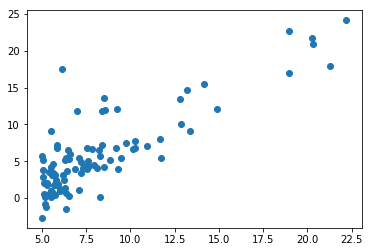

In [20]:
plt.scatter([row[0] for row in data] , [row[1] for row in data] )

In [24]:
o = [[1],[2],[3]]

In [25]:
[[0] + i for i in o]

[[0, 1], [0, 2], [0, 3]]

In [171]:
class LinearRegression:
    
    def __init__(self, alpha, num_iters, theta = [[1],[1]]):
        
        self.alpha = alpha
        self.theta = theta
        self.num_iters = num_iters
        
        
    @staticmethod
    def mat_cell_product(l1,l2):
    
        cell = 0
        for i in range(len(l1)):

            cell += l1[i] * l2[i]

        return cell
        

    @staticmethod
    def mat_mul(mat1,mat2):

        try:      
            rows_1 = len(mat1)
            cols_1 = len(mat1[0])
            rows_2 = len(mat2)
            cols_2 = len(mat2[0])

        except:
            raise ValueError('Input must be matrix')

        assert cols_1 == rows_2, 'matrix dimension unmatch!'

        product = [[0 for c in range(cols_2)] for r in range(rows_1)]

        for r in range(len(product)):
            for c in range(len(product[0])):

                product[r][c] = mat_cell_product(mat1[r], [m[c] for m in mat2])

        return product
    
    
    @staticmethod
    def mat_minus(mat1, mat2):
        
        gap = [[0 for c in range(len(mat1[0]))] for r in range(len(mat1))]
        
        for row in range(len(mat1)):
            for col in range(len(mat1[0])):
                gap[row][col] = mat1[row][col] - mat2[row][col]
        
        return gap
    
    
    @staticmethod
    def mat_transpose(mat1):
        
        rows = len(mat1)
        cols = len(mat1[0])
        transposed = [[0 for r in range(rows)] for c in range(cols)]
        
        for r in range(rows):
            for c in range(cols):
                transposed[c][r] = mat1[r][c]
                
        return transposed
    
    
    @staticmethod
    def scaler_mat_mul(scaler, mat):
        
        rows = len(mat)
        cols = len(mat[0])
        
        for r in range(rows):
            for c in range(cols):
                mat[r][c] *= scaler
                
        return mat
    
    
    def fit(self, X, y):
        X = [[1] + i for i in X]
        m = len(X)
        
        thetas = []
        costs = []
        
        for i in range(self.num_iters):
            
            self.gradient_descent(m, X, y)
            
            thetas.append(self.theta)
            
            cost = self.cost_function(m, X, y)
            
            costs.append(cost)
        
        return {
            'coefficients': thetas,
            'costs': costs
        }
            
        
        
    def cost_function(self, m, X, y):
        
        error = self.mat_minus(self.mat_mul(X, self.theta), y)
        
        cost = sum([el[0] ** 2 for el in error]) / (2 * m)
        
        return cost
    
    
    
    def gradient_descent(self, m, X, y):
        
        self.theta = self.mat_minus(self.theta, self.scaler_mat_mul((self.alpha / m), self.mat_mul(self.mat_transpose(X), self.mat_minus(self.mat_mul(X, self.theta), y))))
        
        
        

In [ ]:
def line_pins(X,coefficients):
    
    coef_x1 = coefficients[1][0]
    coef_x0 = coefficients[0][0]
    
    y_pred = [[x[0] * coef_x1 + coef_x0] for x in X]
    
    return y_pred

In [249]:
linear_model = LinearRegression(0.003, 3000)

In [250]:
X = [[i[0]] for i in data]
y = [[i[1]] for i in data]

In [251]:
results = linear_model.fit(X,y)

In [252]:
y_pred = line_pins(X,results['coefficients'][results['costs'].index(min(results['costs']))])
#line = line_pins(results['coefficients'][results['costs'].index(min(results['costs']))])

In [253]:
results['costs'].index(min(results['costs']))

2999

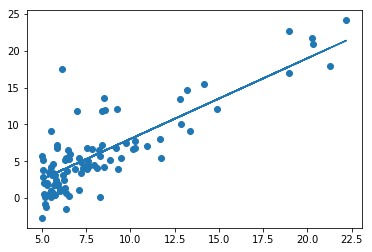

In [254]:
plt.scatter(X,y)
plt.plot(X,y_pred)

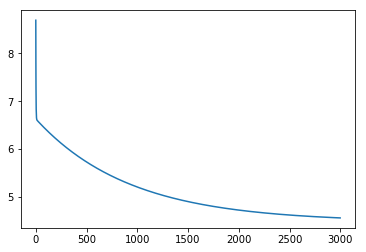

In [255]:
plt.plot(results['costs'])

In [256]:
results['coefficients']

[[[0.9900380051546391], [0.9272953207704846]],
 [[0.9818856632185454], [0.8725898478502742]],
 [[0.975096935462063], [0.831443662938206]],
 [[0.9693358078077865], [0.800512047060164]],
 [[0.9643491509341977], [0.7772753266014123]],
 [[0.9599462750060277], [0.7598353585017213]],
 [[0.9559835276607418], [0.7467622166610439]],
 [[0.9523526912258664], [0.7369786963704403]],
 [[0.9489722420068974], [0.729673308156265]],
 [[0.9457807656558355], [0.7242347335241395]],
 [[0.9427319967776763], [0.7202024485733634]],
 [[0.9397910821223756], [0.7172295273361889]],
 [[0.9369317655391741], [0.7150546204564439]],
 [[0.9341342673211943], [0.7134808459169117]],
 [[0.9313836866543315], [0.7123598868131495]],
 [[0.9286687981357539], [0.7115800117461294]],
 [[0.9259811451564476], [0.711057050237203]],
 [[0.9233143569200408], [0.7107275942469307]],
 [[0.9206636339333115], [0.7105438766823962]],
 [[0.9180253604112917], [0.7104699132284993]],
 [[0.9153968122908113], [0.7104785958777732]],
 [[0.9127759372686

In [33]:
linear_model.mat_mul(matrix1,matrix2)

[[13], [13]]

In [34]:
linear_model.mat_transpose(matrix1)

[[0, 0], [1, 1], [2, 2], [3, 3], [4, 4]]

In [59]:
linear_model.scaler_mat_mul(9,matrix2)

[[27], [-18], [0], [45], [0]]